## CS 506 Spring 2021 - HW2 
### Classification and Dimensionality Reduction (Total: 32 points)
#### Package Limitations: None

#### Name: Kaiyan Xu
#### BU ID: U73265566
#### BU Email: stevenhh@bu.edu

#### People you consulted working on this hw:





### 1. Least Squares and Logistic Regression

In this section, we are going to compare two linear models for classification, especially when outliers are presented in the data. Please refer to Section 4.1.3 at Page 184 of the book [Pattern Recognition and Machine Learning](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf) for the context of this problem as well as the explanation of Figure1

Figure 1: The comparison of least square and logistic regression in classification of two classes with/without outliers

![Figure 1](figure_1.png "some titile")

a) \[1 pt.\] Generate labeled random 2D points like the ones shown in the left subfigure of Figure1. Note that the red crosses and blue circles are points of different classes, so you may need to have a third column storing the label info of the 2D points. Let’s call this data “data without outlier”. Now on top of this data, add a few outliers to the blue circles just like the right subfigure of Figure1 and save the data as “data with outlier”. You may either use code or even manually choose some random 2D points. Your data need not to be exactly the same as the ones shown on the plots.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import List, Dict, Tuple
import numpy as np
import matplotlib.pyplot as plt
import random

In [50]:
def generate_random_points(with_outlier: bool):
    """
    Generate a few random points and return such dataset
    
    :param with_outlier: whether outlier is generated with the data points
    :return: dataframe
    """
    random_float_x1 = []
    random_float_x2 = []
    
    for index_X in range(50):
        random_float_x1.append(random.uniform(-4, 1.8))
        random_float_x2.append(random.uniform(-1, 3.5)) 
    x_without_outlier = np.append(random_float_x1, random_float_x2)
    
    random_float_y1 = []
    random_float_y2 = []
    
    for index_Y in range(50):
        random_float_y1.append(random_float_x1[index_Y] + random.uniform(0.5, 2.2))
        random_float_y2.append(random_float_x2[index_Y] - random.uniform(0.5, 3.5))  
    y_without_outlier = np.append(random_float_y1,random_float_y2)
    
    plt.scatter(random_float_x1, random_float_y1, c='red', s = 20)
    plt.scatter(random_float_x2, random_float_y2, c='blue', s = 20)
    plt.axis([-4, 9, -9, 4])
    
    if (with_outlier == False):
        plt.show()
        data = {'x': x_without_outlier, 'y': y_without_outlier, 'class': 0}
        df = pd.DataFrame(data)
        df.loc[:50, 'class'] = 1
        return df
    else:
        # True
        random_float_x_outlier = []
        random_float_y_outlier = []
        for index_X in range(10):
            random_float_x_outlier.append(random.uniform(6.5, 8.5))
        for index_y in range(10):
            random_float_y_outlier.append(random.uniform(-5, -7))
        plt.scatter(random_float_x_outlier, random_float_y_outlier, c='blue', s = 20)
        plt.show()
        data = {'x': np.concatenate((x_without_outlier, random_float_x_outlier)), 
                'y': np.concatenate((y_without_outlier, random_float_y_outlier)), 'class':1}
        df = pd.DataFrame(data)
        df.loc[:50, 'class'] = 1
        return df

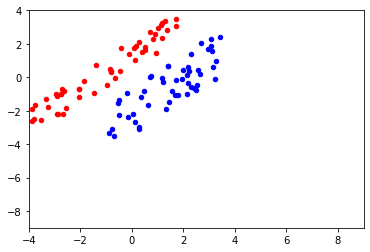

In [51]:
# Do some test print outs to verify correctness
df_without_outlier = generate_random_points(False)

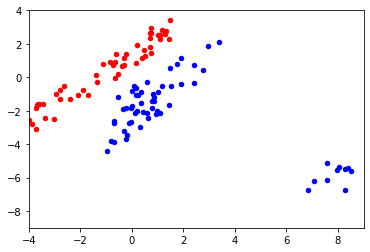

In [52]:
df_with_outlier = generate_random_points(True)

b) \[4 pts.\] Use both the least squares method and the logistic regression method to classify the “data without outlier” and “data with outlier”.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def logistic_regression_classify(dataset):
    """
    parameter: the results of generate_random_points(), which is a dataset
    """
    df = dataset.to_numpy()
    logreg = LogisticRegression().fit(df[:,:2],df[:,2])
    return logreg.coef_, logreg.intercept_

In [54]:
from sklearn.linear_model import LinearRegression

def least_squares_classify(dataset):
    dataset.loc[50:, 'class'] = -1
    df = dataset.to_numpy()
    linreg = LinearRegression().fit(df[:,:2],df[:,2])
    return  linreg.coef_, linreg.intercept_

In [55]:
# Classify data with and without outlier here 
# linear no outlier
coef2, intercept2 = least_squares_classify(df_without_outlier)
coef3, coef4 = coef2.T[0], coef2.T[1]
slope2 = -coef3/coef4
intercept2 = -intercept2/coef4

# logistic outlier
coef_out2, intercept_out2 = least_squares_classify(df_with_outlier)
coef_out3, coef_out4 = coef_out2.T[0], coef_out2.T[1]
slope_out2 = -coef_out3/coef_out4
intercept_out2 = -intercept_out2/coef_out4

# logistic no outlier
coef, intercept = logistic_regression_classify(df_without_outlier)
coef1, coef2 = coef.T[0], coef.T[1]
slope = -coef1/coef2
intercept = -intercept/coef2

# logistic outlier
coef_out, intercept_out = logistic_regression_classify(df_with_outlier)
coef_out1, coef_out2 = coef_out.T[0], coef_out.T[1]
slope_out = -coef_out1/coef_out2
intercept_out = -intercept_out/coef_out2

c) \[2 pts.\] Plot the classification results into two figures side by side just like Figure1. Have you got similar results like Figure1? Explain briefly why the logistic regression is not sensitive to outliers.

In [56]:
def plot_classification_results(dataset, slope1, slope2, intercept1, intercept2):
    """
    Plot classification results of data with outlier and data without outlier
    
    :param: orginal dataset, slope and intercept of logistic regression and linear regression
    """
    x = dataset['x']
    y = dataset['y']
    plt.scatter(x[0:50], y[0:50], c='red', s = 20)
    plt.scatter(x[50:], y[50:], c='blue', s = 20)
    plt.plot(x, slope2*x + intercept2, color = 'purple')
    plt.plot(x, slope*x + intercept, color = 'green')
    plt.axis([-4, 9, -9, 4])
    plt.show()

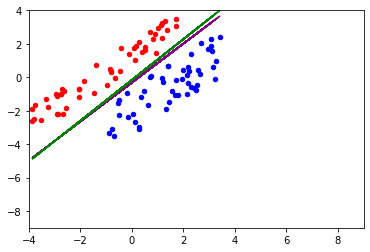

In [57]:
plot_classification_results(df_without_outlier, slope, slope2, intercept, intercept2)

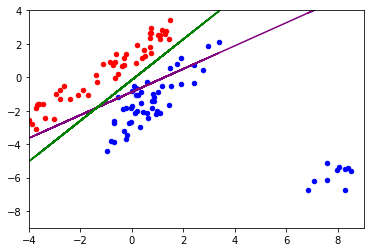

In [58]:
plot_classification_results(df_with_outlier, slope_out, slope_out2, intercept_out, intercept_out2)

Logistic regression is not sensitive to outliers because it only considers points that are closer to the decision boundary. In comparison, linear regression plots a line that minimizes the sum of squared residuals, and outliers will add a lot to that if not shifting the line.

### 2 Logistic Regression and kNN Classification

The goal of this problem is to perform classification on the famous MNIST dataset.

We have already preprocessed a sample of this dataset (30% of the original dataset), that you can find here: [Download from Google Drive](https://drive.google.com/open?id=1phX7-hv5FNye7mPzddr1oplZIhAgmycz) in the format of NumPy arrays.

File mnist data.npy contains an array of the data -each row corresponds to a 28 × 28 digit picture vectorized to create 28*28=784 features, while the file mnist labels.npy contains the respective labels of the images.

a) \[0 pts.\] Randomly split the dataset, using 20% of the samples as your test set and the remaining 80% as the train set that you will use to fit your models.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

def read_mnist_data():
    """
    Load numpy array of MNIST dataset from data.npy file
    
    :param file_path: string path to dataset 
    :return: numpy array representation of the mnist dataset
    """
    feature = np.load("mnist_data.npy")
    label = np.load("mnist_labels.npy")    
    return feature, label

In [2]:
def split_data():
    x_train, x_test, y_train, y_test = train_test_split(
        read_mnist_data()[0], read_mnist_data()[1], test_size = 0.2, train_size = 0.8, random_state = 50)
    return x_train, x_test, y_train, y_test

b) \[2 pts.\] Try to classify the images using Logistic Regression. Have in mind that the dataset contains more than 2 labels, hence is a multinomial classification problem. What is your train accuracy and test accuracy?

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def logistic_regression_classify_mnist():
    """
    Classify mnist dataset with logistic regression
    
    :param: no parameter 
    :return: train and test accuracy of the model
    """
    x_train, x_test, y_train, y_test = split_data()
    
    logreg = LogisticRegression(multi_class='multinomial', solver = 'lbfgs')
    logreg.fit(x_train, y_train)
    
    y_train_pred = logreg.predict(x_train)
    y_test_pred = logreg.predict(x_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print('Train accuracy: ' + str(train_accuracy))
    print('Test accuracy: ' + str(test_accuracy))
    return train_accuracy, test_accuracy

In [4]:
logistic_regression_classify_mnist()

Train accuracy: 0.9598611111111112
Test accuracy: 0.8925


/Users/xukaiyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9598611111111112, 0.8925)

c) \[3 pts.\] Now, try to classify the dataset using a k-Nearest Neighbor classifier. Plot the train and test accuracy as you vary k from 1 to 25 with a step size of 2.


In [5]:
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt

def knn_classify_mnist():
    """
    Classify mnist dataset with knn
    
    :param: no parameter 
    :return: list of accuracy of different k
    """
    x_train, x_test, y_train, y_test = split_data()
    kvals = range(1, 27, 2)
    acc = []
    test_rep = []
    train_rep = []
    for k in kvals:        
        knn = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)    
        y_test_pred = knn.predict(x_test)
        y_train_pred = knn.predict(x_train)        
        acc.append([accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)])
    accy = np.array(acc)
    
    plt.plot(kvals, accy[:, 1], '.-', label = 'Accuracy on Test Data')
    plt.plot(kvals, accy[:, 0], '.-', label = 'Accuracy on Training Data')
    plt.xticks(np.arange(1, 27, 2))
    plt.xlabel(r'$k$')
    plt.ylabel('Accuracy')
    plt.title('Train/Test Comparision of $k$-NN')
    plt.legend(loc = 'best')
    plt.show()
    
    return accy

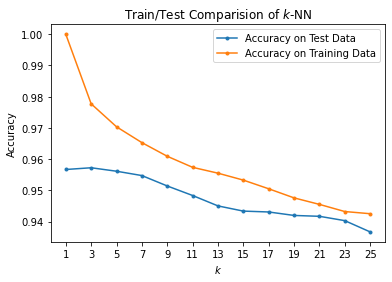

array([[1.        , 0.95666667],
       [0.97770833, 0.95722222],
       [0.97034722, 0.95611111],
       [0.96527778, 0.95472222],
       [0.96090278, 0.95138889],
       [0.95736111, 0.94833333],
       [0.95548611, 0.945     ],
       [0.95326389, 0.94333333],
       [0.95048611, 0.94305556],
       [0.94756944, 0.94194444],
       [0.94548611, 0.94166667],
       [0.94319444, 0.94027778],
       [0.9425    , 0.93666667]])

In [6]:
knn_classify_mnist()
# highest accuracy at k = 3

d) \[1 pt.\] Explain your results.


The accuracy of testing set slightly increases from k=1 to k=3, and then keeps falling. A larger k tends to smooth the boundary but computationally expensive. A small k is sensitive to the noises and sometimes leads to overfitting. Here, the result is surprising probably because the points are close to each other and it is less sensitive to noise.

e) \[5 pts.\] Now use kNN to explore how a different sized train set affects your results. Plot the accuracy of your model when only using 3,000 of the images in the train set (repeat this experiment using 6,000, 9,000, and so on until you are using the full train set). Use whatever value of k you found that worked best in part (c). You will be doing something similar in Problem 3(d) so it makes sense to run both experiments at the same time.

In [7]:
import random
from sklearn.utils import shuffle

def sample_dataset(x, y, select_size) -> np.array:
    """
    Randomly sample a certain size of the dataset
    
    :param select_size: the return size of dataset
    :return: random subset of dataset
    """
    # shuffle with the same order
    X_shuffled, y_shuffled = shuffle(x, y, random_state=0)
    X_subset = X_shuffled[0:select_size,:]
    y_subset = y_shuffled[0:select_size]
    return X_subset, y_subset

def knn_experiment():
    """
    Run mnist knn experiment of varying training size
    
    :param : no parameter, I decided to do train_test_split inside function
    :return: list of train and test accuracies of the modeles
    """
    x_train, x_test, y_train, y_test = split_data()
    sizes = [3000, 6000, 9000, 12000, 14400]
    acc = []
    for size in sizes:
        x, y = sample_dataset(x_train, y_train, size)
        knn = KNeighborsClassifier(n_neighbors = 3).fit(x, y) 
        y_test_pred = knn.predict(x_test)
        y_train_pred = knn.predict(x_train)        
        acc.append([accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)])
    accy = np.array(acc)
    return accy
    
def plot_accuracies_over_train_sizes():
    """
    Plot the accuracies over training size
    
    :draw a plot showing the accuracy 
    """
    accy = knn_experiment()
    
    training_size = [3000, 6000, 9000, 12000, 14400]
    plt.plot(training_size, accy[:, 1], '.-', label = 'Accuracy on Test Data')
    plt.plot(training_size, accy[:, 0], '.-', label = 'Accuracy on Training Data')
    plt.xlabel(r'$training_size$')
    plt.ylabel('Accuracy')
    plt.title('Train/Test Comparision of $k$-NN')
    plt.legend(loc = 'best')
    plt.show()

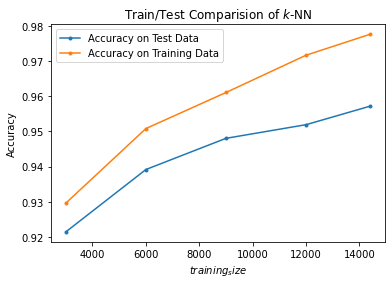

In [8]:
plot_accuracies_over_train_sizes()

f) \[2 pts.\] Give a few bullet points explaining the pros and cons of these algorithms and when and why we use logistic regression over linear regression.

KNN:
pros: 
useful for both regression and classification;
intuitive and simple;
no assumptions about data

cons:
The computational cost of classification grows with the size of the training data;
Require data scaling;
If data has a high dimensionality, points are fat apart in high dimension and points tend to all be at similar distances in high dimension, so hard to tell which are the k nearest neighbors

Logistic Regression:
Pros:
easier to implement, interpret, and very efficient to train;
easily extend to multiple classes(multinomial regression) and a natural probabilistic view of class predictions;
It not only provides a measure of how appropriate a predictor(coefficient size)is, but also its direction of association (positive or negative);
less sensitive to outliers

Cons:
It constructs linear boundaries, and assumes linearity between the dependent variable and the independent variables, which may not be all the cases;
It can only be used to predict discrete functions;
It requires average or no multicollinearity between independent variables


Linear Regression:
Pros:
It is the best choice if there indeed exists linear relationship between the dependent and independent variables;
simple to implement and easier to interpret the output coefficients;
Over-fitting can be avoided using some dimensionality reduction techniques, regularization (L1 and L2) techniques and cross-validation

Cons:
Outliers can have huge effects on the regression;
It looks at a relationship between the mean of the dependent variables and the independent variables, and mean is not a complete description of a single variable, so not a complete description of relationships among variables;
Linear regression makes strong assumptions that independent and dependent variables are linearly related which may not be the case

When and Why use logistic regression:
Logistic regression is firstly considered to handle the classification problems;
When the data is discrete rather than continuous
When the dependent variables are dichotomous
Logistic regression is based on the concept of Maximum Likelihood estimation. According to this estimation, the observed data should be most probable;
To perform Logistic regressionm we do not require a linear relationship between the dependent and independent variables under linear regression;
It is not sensitive to outliers compared to linear regression

### PCA - Dimensionality Reduction

The original dataset contains 28 ∗ 28 = 784 features. Therefore, we will try to reduce the dimension by using PCA.

a) \[1 pt.\] Perform PCA decomposition, initially using all principal components. Before performing PCA you usually need to mean-center the data, [see here why](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html), which means you have to calculate the mean of each variable (column) and subtract it from the respective column. However, many libraries perform this step implicitly, so consult the documentation of the library you are going to use (e.g. PCA of Sklearn).

In [9]:
feature, label = read_mnist_data()

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import decomposition

def pca_decomposition():
    """
    Perform PCA decomposition over mnist dataset
    
    :param dataset: mnist dataset in numpy format
    :param num_components: number of components to reduce to. If None, use all of components
    :return: standardized feature and data after pca
    """
    standardized_data = StandardScaler().fit_transform(feature)
    pca = decomposition.PCA()
    pca.n_components = 784
    pca_data = pca.fit_transform(standardized_data)
    return standardized_data, pca_data

In [11]:
pca_decomposition()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[-1.68933061e+00, -5.94858978e+00,  2.22329310e+00, ...,
         -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
        [ 1.45006899e+00, -8.65777894e-01,  4.93813092e+00, ...,
          1.99175807e-16,  1.03333626e-16, -8.53346668e-17],
        [ 7.17654045e+00, -6.26508914e+00, -3.71630851e+00, ...,
          2.15690579e-16,  6.95373134e-16,  2.81895761e-16],
        ...,
        [ 8.80466757e-01, -1.19282989e+01,  5.22193603e-01, ...,
         -1.72756430e-18,  1.64557476e-17, -9.63273971e-18],
        [-4.71757761e+00,  9.64237420e-01, -4.15831821e+00, ...,
          1.87947817e-17, -2.00681698e-18,  5.10070800e-19],
        [-5.15170735e-01, -5.11998585e-01, -3.15890712e+00, ...,
          8.28055023e-18,  3.28507009e-19, 

b) [2 pts.] Plot the CDF of the explained variance as a function of the number of principal components.


In [12]:
def plot_pca_cdf():
    """
    Plot CDF of explained variance as a function of number of principal components
    
    :param: no parameter
    :plot a graph
    """
    standardized_data, pca_data = pca_decomposition()
    pca = decomposition.PCA()
    pca_label = pca.fit(standardized_data)
    
    # reference: https://medium.com/analytics-vidhya/principal-component-analysis-pca-with-code-on-mnist-dataset-da7de0d07c22
    percentage_var_explained = pca_label.explained_variance_ / np.sum(pca_label.explained_variance_)
    cum_var_explained = np.cumsum(percentage_var_explained)
    
    plt.plot(cum_var_explained)
    plt.xlabel("number of components")
    plt.ylabel("CDF of explained variance ratio")
    plt.title("CDF of the explained variance ratio versus the number of principle components")
    plt.axhline(y = 0.9, color = 'r')
    plt.show()

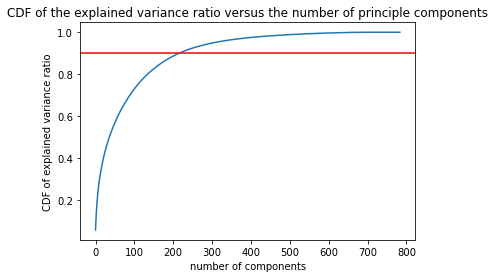

In [13]:
plot_pca_cdf()

c) [1 pt.] Choose a number of principal components to use by arguing why your choice is reasonable as a trade-off between the number of components used and classification performance. Afterwards, train a kNN classifier (choose a k that gave you the best results in Problem 2c.) and report train and test accuracy.


I choose number of components of 200. Because further increasing number of components does not cause the increase in explained variance as fast as before. There explain close to 90% of the variance after plotting the line on 0.9.

In [16]:
def knn_classify_mnist_with_pca(k, num_components):
    """
    Classify mnist dataset with K-nearest neighbor
    
    :param k: number of nearest neighbors
    :param num_components: number of components to keep after PCA
    :return: train and test accuracy of the model
    """
    standardized_data = StandardScaler().fit_transform(feature)
    pca = decomposition.PCA()
    pca.n_components = num_components
    pca_data = pca.fit_transform(standardized_data)

    x_train, x_test, y_train, y_test = train_test_split(
        pca_data, label, test_size = 0.2, random_state = 50)

    train_scalar = preprocessing.StandardScaler()
    x_train = train_scalar.fit_transform(x_train)
    x_test = train_scalar.transform(x_test)
    
    # k = 3 in 2(c)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print('Train accuracy: ' + str(train_accuracy))
    print('Test accuracy: ' + str(test_accuracy))
    return train_accuracy, test_accuracy

In [17]:
knn_classify_mnist_with_pca(3, 200)

Train accuracy: 0.9422916666666666
Test accuracy: 0.8805555555555555


(0.9422916666666666, 0.8805555555555555)

d) [5 pts.] For this part we will perform the following experiment: First, randomly sample a part of your dataset (using a fixed k and all features), of size ranging from 3,000 to 21,000 (the whole dataset) in increments of 3,000. Fit a kNN classifier and plot the running time.
Now, use a fixed k and all samples of your dataset, but fit a kNN classifier using a varying number of Principal Components, ranging from 50 to 750 in increments of 100. Plot the running time on the same plot as above.

Describe the plot. What seems to affect -as a trend- the fitting time more? Number of samples used for trying, or the dimensions of the data?

-Python’s time package may be useful for this problem.


In [19]:
import time

def sample_dataset_pca(select_size):
    """
    Randomly sample a certain size of the dataset
    
    :param select_size: the return size of dataset
    :return: random subset of dataset
    """
    # shuffle with the same order
    X_shuffled, y_shuffled = shuffle(feature, label, random_state=0)
    X_subset = X_shuffled[0:select_size,:]
    y_subset = y_shuffled[0:select_size]
    return X_subset, y_subset

def train_size_experiment():
    """
    Experiment classifying mnist with different training size
    
    :param : no parameter
    :return: a list of experiment time
    """
    sizes = [3000, 6000, 9000, 12000, 15000, 18000]
    acc = []
    for size in sizes:
        start_time = time.time()
        feature_sample, label_sample = sample_dataset_pca(size)
        
        standardized_data = StandardScaler().fit_transform(feature_sample)
        pca = decomposition.PCA()
        pca.n_components = 200
        pca_data = pca.fit_transform(standardized_data)
                
        x_train, x_test, y_train, y_test = train_test_split(
            pca_data, label_sample, test_size = 0.2, random_state = 50)
        
        train_scalar = preprocessing.StandardScaler()
        x_train = train_scalar.fit_transform(x_train)
        x_test = train_scalar.transform(x_test)
        
        knn = KNeighborsClassifier(n_neighbors = 3)
        knn.fit(x_train, y_train)
        y_train_pred = knn.predict(x_train)
        y_test_pred = knn.predict(x_test) 
        end_time = time.time()
        acc.append(end_time - start_time)
    accy = np.array(acc)
    return accy

def num_component_experiment() :
    """
    Experiment classifying mnist with different number of top principal components
    
    :param : no parameter
    :return: a list of experiment time
    """
    sizes = [50, 150, 250, 350, 450, 550, 650, 750]
    acc = []
    for size in sizes:
        start_time = time.time()        
        standardized_data = StandardScaler().fit_transform(feature)
        pca = decomposition.PCA()
        pca.n_components = size
        pca_data = pca.fit_transform(standardized_data)
                
        x_train, x_test, y_train, y_test = train_test_split(
            pca_data, label, test_size = 0.2, random_state = 50)
        
        train_scalar = preprocessing.StandardScaler()
        x_train = train_scalar.fit_transform(x_train)
        x_test = train_scalar.transform(x_test)
        
        knn = KNeighborsClassifier(n_neighbors = 3)
        knn.fit(x_train, y_train)
        y_train_pred = knn.predict(x_train)
        y_test_pred = knn.predict(x_test) 
        end_time = time.time()
        acc.append(end_time - start_time)
    accy = np.array(acc)
    return accy

In [21]:
train_size_time = train_size_experiment()
num_component_time = num_component_experiment()
print(train_size_time)
print(num_component_time)

[0.64859414 1.30535197 4.27707195 4.52230501 4.81816077 6.97695017]
[ 6.11454105  6.62360287 13.56237268  8.47367096  9.75116396 14.0712862
 19.55539584 11.035285  ]


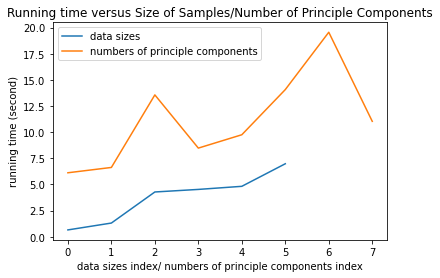

In [22]:
import seaborn as sns

plot_train = sns.lineplot(data = train_size_time, label = 'data sizes')
plot_principle = sns.lineplot(data = num_component_time, label = 'numbers of principle components')
plot_train.set_xlabel("data sizes index/ numbers of principle components index")
plot_train.set_ylabel("running time (second)")
plot_train.set_title("Running time versus Size of Samples/Number of Principle Components")
plt.show()
# on the x_axis, the tick is the index in data size and principal component lists. For example, x = 0 means both 
# data size = 3000 and number of principal components = 50

Both running time increase as size of data and number of principle components increase. It looks like that number of principle components affect the fitting time more, but increasing in a higher rate and more vibrantly. It is probably because that k chosen is small, so time for comparing each point is small, and time increases little even though data size increases.

e) [3 pts.] Using your results from the previous question, produce the most accurate model you can on the condition that it is faster than 50% of the models you tested. List the values chosen for: k, number of samples, and number of principal components. How does this model compare to your most accurate model (the best model you created when time wasn’t a factor)?


In [23]:
# all the models with running time faster than 50% of the models
print(np.sort(np.append(train_size_time, num_component_time))[:7])

[0.64859414 1.30535197 4.27707195 4.52230501 4.81816077 6.11454105
 6.62360287]


In [61]:
# try models with time 6.62 and 4.81, 6.61

# when time = 4.81 and sample size = 15000
def trial_time_1():
    feature_sample, label_sample = sample_dataset_pca(15000)
    standardized_data = StandardScaler().fit_transform(feature_sample)
    pca = decomposition.PCA()
    pca.n_components = 200
    pca_data = pca.fit_transform(standardized_data)
                
    x_train, x_test, y_train, y_test = train_test_split(
        pca_data, label_sample, test_size = 0.2, random_state = 50)
    
    train_scalar = preprocessing.StandardScaler()
    x_train = train_scalar.fit_transform(x_train)
    x_test = train_scalar.transform(x_test)
    
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(x_train, y_train)
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    return train_accuracy, test_accuracy

# when time = 6.62 and n_components = 150
def trial_time_2():
    standardized_data = StandardScaler().fit_transform(feature)
    pca = decomposition.PCA()
    pca.n_components = 150
    pca_data = pca.fit_transform(standardized_data)
            
    x_train, x_test, y_train, y_test = train_test_split(
        pca_data, label, test_size = 0.2, random_state = 50)
    
    train_scalar = preprocessing.StandardScaler()
    x_train = train_scalar.fit_transform(x_train)
    x_test = train_scalar.transform(x_test)
    
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(x_train, y_train)
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test) 
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    return train_accuracy, test_accuracy

# when time = 6.11 and n_components = 50
def trial_time_3():
    standardized_data = StandardScaler().fit_transform(feature)
    pca = decomposition.PCA()
    pca.n_components = 50
    pca_data = pca.fit_transform(standardized_data)
            
    x_train, x_test, y_train, y_test = train_test_split(
        pca_data, label, test_size = 0.2, random_state = 50)
    
    train_scalar = preprocessing.StandardScaler()
    x_train = train_scalar.fit_transform(x_train)
    x_test = train_scalar.transform(x_test)
    
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(x_train, y_train)
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test) 
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    return train_accuracy, test_accuracy

In [62]:
print(trial_time_1())
print(trial_time_2())
print(trial_time_3())

(0.9373333333333334, 0.8943333333333333)
(0.9538888888888889, 0.9063888888888889)
(0.9665972222222222, 0.9338888888888889)


After comparison, I choose the model with k = 3, size = 18000 and number of principal components = 50, which provides the highest accuracy.

In [59]:
# Assuming model performs the best with full size, and I have gotten that the best k is 3, so I do cross validation
# to get the number of principal components that gives the best accuracy.
def num_component_experiment() :
    """
    Experiment classifying mnist with different number of top principal components
    
    :param : no parameter
    :return: a list of experiment accuracies
    """
    sizes = [1, 10, 30, 40, 45, 50, 60, 150, 350, 550, 784]
    test_acc = []
    for size in sizes:
        start_time = time.time()        
        standardized_data = StandardScaler().fit_transform(feature)
        pca = decomposition.PCA()
        pca.n_components = size
        pca_data = pca.fit_transform(standardized_data)
                
        x_train, x_test, y_train, y_test = train_test_split(
            pca_data, label, test_size = 0.2, random_state = 50)
        
        train_scalar = preprocessing.StandardScaler()
        x_train = train_scalar.fit_transform(x_train)
        x_test = train_scalar.transform(x_test)
        
        knn = KNeighborsClassifier(n_neighbors = 3)
        knn.fit(x_train, y_train)
        y_test_pred = knn.predict(x_test) 
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_acc.append(test_accuracy)
    accy = np.array(test_acc)
    return accy

In [60]:
print(num_component_experiment())

[0.24694444 0.88555556 0.93638889 0.93361111 0.93305556 0.93527778
 0.93638889 0.90666667 0.78416667 0.55527778 0.37666667]


Therefore, in my case, the best model is k = 3, size = 18000, number of principal = 30. The accuracy is slight higher than the model considering time.

f) [1 pt.] Bonus point: Plot the images of the 10 first Principal Components. That is, plot the image approximation using each principle component.

In [79]:
def plot_components():
    """
    Plot top 10 principal components
    
    :param top_components: number of top components to plot
    :return: 10 images
    """
    sizes = [1,2,3,4,5,6,7,8,9,10]
    for size in sizes:
        standardized_data = StandardScaler().fit_transform(feature)
        pca = decomposition.PCA()
        pca.n_components = size
        # reference: https://towardsdatascience.com/image-compression-using-principal-component-analysis-pca-253f26740a9f
        mnist_pca_reduced = pca.fit_transform(standardized_data)
        mnist_pca_recovered = pca.inverse_transform(mnist_pca_reduced)
        
        image_pca = mnist_pca_recovered[1,:].reshape([28,28])
        plt.imshow(image_pca, cmap='gray_r')
        plt.title(f'Compressed image - {size}', fontsize=15, pad=15)
        plt.show()

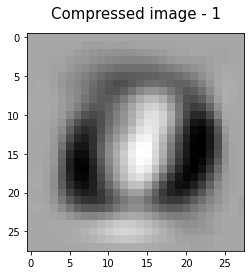

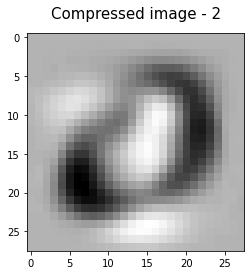

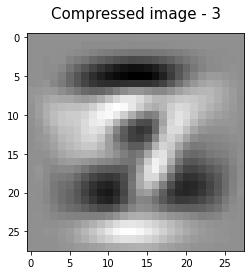

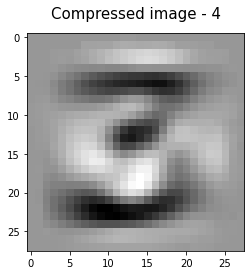

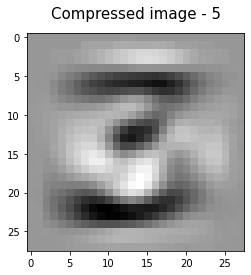

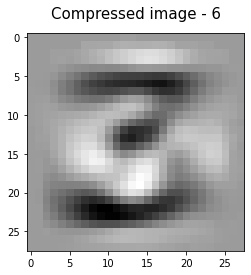

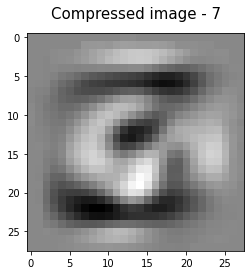

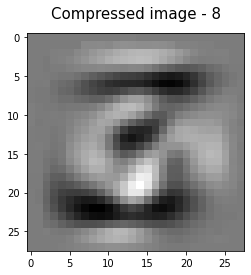

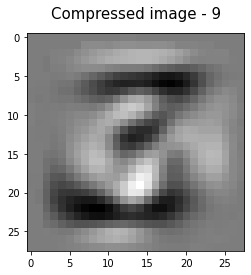

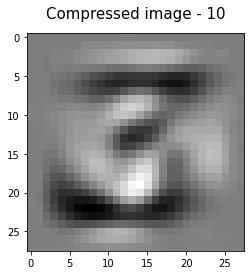

In [80]:
plot_components()